# LAB 2
## 2. Logistic regression


### 데이터 설명

- 설명변수 (25개) 
    - ID, AGE, INCOME, SEX, MARRIED (1: 결혼, 0: 미혼)
    - FICO (신용점수), OWNHOME (자가 주택 소유 여부, 1: 소유), LOC (거주지, A-H)
    - BUY6, 12, 18 (최근 6, 12, 18개월 간의 구입 횟수),VALUE24 (지난 24개월 간의 구입 총액),ORGSRC (고객 분류), DISCBUY (할인 고객 여부, 1: 할인 고객), RETURN24 (지난 24개월 간 상품 반품 여부), COA6 (6개월 간의 주소변경 여부, 1: 주소변경)
- 반응변수: RESPOND (DM에 대한 반응 여부)

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

buy=pd.read_table('buytest.txt', delimiter=" ")

print('Data head \n', buy.head())
print('Data shape: ',buy.shape)

D:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Data head 
           ID  RESPOND   AGE  INCOME SEX  MARRIED   FICO  OWNHOME LOC  CLIMATE  \
0  001371057        0  71.0    67.0   M      1.0  719.0      0.0   A       10   
1  002093270        0  53.0    72.0   M      1.0  751.0      0.0   A       10   
2  002783726        0  53.0    70.0   F      1.0  725.0      0.0   A       10   
3  010800860        0  45.0    56.0   F      0.0  684.0      0.0   A       10   
4  014577797        0  32.0    66.0   F      0.0  651.0      0.0   A       10   

     ...     RETURN24  COA6  C1  C2 C3  C4  C5  C6  C7  PURCHTOT  
0    ...            0     0   0   0  0   0   0   0   0         0  
1    ...            0     0   0   0  0   0   0   0   0         0  
2    ...            0     0   0   0  0   0   0   0   0         0  
3    ...            0     0   0   0  0   0   0   0   0         0  
4    ...            0     0   0   0  0   0   0   0   0         0  

[5 rows x 26 columns]
Data shape:  (10000, 26)


In [2]:
print('The number of missing data: ', buy.isnull().sum())

# 결측치 제거
buy_com = buy.dropna()
buy_com = buy_com.drop(["ID"], axis = 1)
print(buy_com.shape)
buy_com.describe().transpose()

The number of missing data:  ID            0
RESPOND       0
AGE         234
INCOME      234
SEX         234
MARRIED     234
FICO         39
OWNHOME     234
LOC           0
CLIMATE       0
BUY6          0
BUY12         0
BUY18         0
VALUE24       0
ORGSRC      521
DISCBUY       0
RETURN24      0
COA6          0
C1            0
C2            0
C3            0
C4            0
C5            0
C6            0
C7            0
PURCHTOT      0
dtype: int64
(9221, 25)


,count,mean,std,min,25%,50%,75%,max
RESPOND,9221.0,0.075046,0.263480,0.0,0.0,0.0,0.0,1.0
AGE,9221.0,44.577269,10.086245,18.0,38.0,44.0,51.0,75.0
INCOME,9221.0,47.941980,15.996169,15.0,35.0,50.0,61.0,114.0
MARRIED,9221.0,0.584102,0.492903,0.0,0.0,1.0,1.0,1.0
FICO,9221.0,694.262228,28.788755,577.0,676.0,695.0,714.0,800.0
OWNHOME,9221.0,0.335864,0.472317,0.0,0.0,0.0,1.0,1.0
CLIMATE,9221.0,20.344865,6.109125,10.0,20.0,20.0,20.0,30.0
BUY6,9221.0,0.127752,0.345957,0.0,0.0,0.0,0.0,2.0
BUY12,9221.0,0.208871,0.435381,0.0,0.0,0.0,0.0,2.0
BUY18,9221.0,0.345733,0.569831,0.0,0.0,0.0,1.0,3.0


- 범주형 변수에 대해 가변수 생성 : SEX, LOC, ORGSRC

In [3]:
buy_com = pd.get_dummies(buy_com, drop_first=True,                            
                         columns= ['SEX', 'LOC', 'ORGSRC'])

In [4]:
buy_com.shape

(9221, 36)

- C1~C7, PURCHTOT은 RESPOND의 원인이 아니라 결과이므로 입력변수에서 제외

In [5]:
buydata = buy_com.drop(["C1","C2","C3","C4","C5","C6","C7","PURCHTOT","CLIMATE"]
                       , axis = 1)

- 데이터셋 분할

In [6]:
train, test = train_test_split(buydata, test_size = 0.3, random_state = 1)
print('train dim: ',train.shape,'\n test dim:', test.shape)
y_train = train.loc[:,"RESPOND"]
X_train = train.drop("RESPOND", axis = 1)

y_test = test.loc[:,"RESPOND"]
X_test = test.drop("RESPOND", axis = 1)
print(X_train.shape, y_train.shape)

train dim:  (6454, 27) 
 test dim: (2767, 27)
(6454, 26) (6454,)


### 탐색적 자료 분석
- 반응 변수의 분포

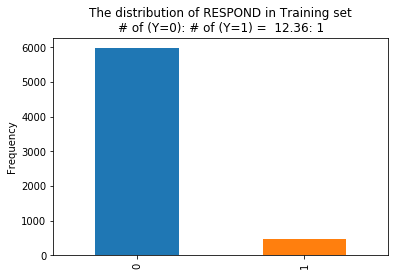

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
count = y_train.value_counts()
ratio = count[0]/count[1]
count.plot(kind = 'bar')
plt.title('The distribution of RESPOND in Training set'+
          "\n# of (Y=0): # of (Y=1) =  %0.2f" % ratio + ": 1")
plt.ylabel('Frequency')
plt.show()

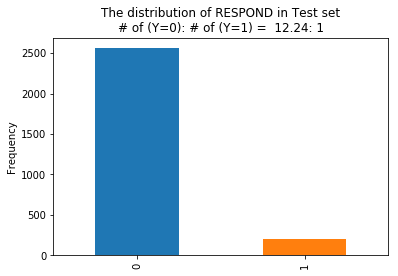

In [8]:
count = y_test.value_counts()
ratio = count[0]/count[1]
count.plot(kind = 'bar')
plt.title('The distribution of RESPOND in Test set'+
          "\n# of (Y=0): # of (Y=1) =  %0.2f" % ratio + ": 1")
plt.ylabel('Frequency')
plt.show()

### 로지스틱 회귀분석

In [9]:
import statsmodels.api as sm


X_train["intercept"] = 1.0 # for intercept
print('X_train dim: ',X_train.shape)
print('rank of X_train^TX_train: ',np.linalg.matrix_rank(X_train.values))

logit = sm.Logit(y_train,X_train)
logit_res = logit.fit(maxiter = 1000)
print(logit_res.summary2())

X_train dim:  (6454, 27)
rank of X_train^TX_train:  27
Optimization terminated successfully.
         Current function value: 0.253546
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.047     
Dependent Variable: RESPOND          AIC:              3326.7778 
Date:               2018-09-03 19:47 BIC:              3509.6341 
No. Observations:   6454             Log-Likelihood:   -1636.4   
Df Model:           26               LL-Null:          -1716.6   
Df Residuals:       6427             LLR p-value:      2.5249e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
AGE           -0.0356    0.0055  -6.4613  0.0000  -0.0464  -0.0248
INCOME 

- 오즈비

In [10]:
print(np.exp(logit_res.params))

AGE           0.965023
INCOME        0.999014
MARRIED       1.571141
FICO          0.994718
OWNHOME       0.731522
BUY6          0.726103
BUY12         0.750456
BUY18         2.164666
VALUE24       0.999955
DISCBUY       0.867134
RETURN24      0.836833
COA6          1.031603
SEX_M         0.931798
LOC_B         0.745643
LOC_C         1.263878
LOC_D         1.355348
LOC_E         0.792130
LOC_F         0.674167
LOC_G         0.921548
LOC_H         0.797771
ORGSRC_D      0.855230
ORGSRC_I      1.346044
ORGSRC_O      1.104324
ORGSRC_P      1.078317
ORGSRC_R      1.055145
ORGSRC_U      1.038093
intercept    13.425084
dtype: float64


- 확률 예측

In [11]:
pred = logit_res.predict(X_train) # fitted probability
pred

6651    0.030568
9819    0.086378
4352    0.059042
1349    0.056794
9962    0.078399
9478    0.044896
5991    0.037978
1941    0.054654
6751    0.046008
2383    0.036409
4968    0.052990
4982    0.029095
8545    0.059641
1711    0.178298
4491    0.051837
6789    0.034200
7477    0.030822
3353    0.047916
7251    0.070973
5443    0.078190
8614    0.099691
1877    0.049352
4253    0.063299
810     0.060101
3643    0.117034
9124    0.115133
135     0.050612
5612    0.070267
6800    0.075417
2249    0.045418
          ...   
3118    0.233309
4788    0.112581
1131    0.047820
6638    0.018940
6810    0.065212
1217    0.092955
2057    0.041681
833     0.085057
3301    0.089566
8840    0.071108
614     0.061184
7085    0.019605
8778    0.033418
5167    0.089295
3856    0.064400
9158    0.061041
2727    0.202077
3207    0.181354
5827    0.027358
5851    0.040899
3752    0.090148
8417    0.050461
4580    0.082325
161     0.039306
5483    0.039845
3138    0.118615
8484    0.120201
993     0.0941

### 사후 추출법을 이용하여 표본 생성

In [12]:
cc_train0 = train.loc[y_train == 0,:]
cc_train1 = train.loc[y_train == 1,:]     
print('train dim: ', train.shape , '\n train y=0 dim:', cc_train0.shape,
      '\n train y=1 dim:', cc_train1.shape)

train dim:  (6454, 27) 
 train y=0 dim: (5971, 27) 
 train y=1 dim: (483, 27)


In [13]:
cc_train, dummy= train_test_split(cc_train0, train_size = 2000, random_state = 123)
print(cc_train.shape)

(2000, 27)


D:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
cc_train = pd.concat([cc_train, cc_train1], axis=0)

y_train1 = cc_train["RESPOND"]
X_train1 = cc_train.drop("RESPOND", axis = 1)
X_train1["intercept"] = 1

print("case control X train dim",X_train1.shape)
print("case control y train dim",y_train1.shape)

case control X train dim (2483, 27)
case control y train dim (2483,)


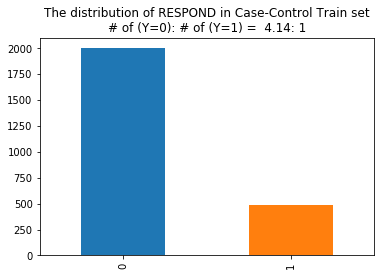

In [15]:
count = y_train1.value_counts()
ratio = count[0]/count[1]
count.plot(kind = 'bar')
plt.title('The distribution of RESPOND in Case-Control Train set'+
          "\n# of (Y=0): # of (Y=1) =  %0.2f" % ratio + ": 1")
plt.show()

- 로지스틱 회귀모형 적합

In [16]:
# logistic
logit1 = sm.Logit(y_train1,X_train1)
logit_cc = logit1.fit(maxiter = 1000)
print(logit_cc.summary2())
print('rank of X_train^TX_train: ',np.linalg.matrix_rank(X_train1.values))

Optimization terminated successfully.
         Current function value: 0.466084
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.054     
Dependent Variable: RESPOND          AIC:              2368.5746 
Date:               2018-09-03 19:47 BIC:              2525.6396 
No. Observations:   2483             Log-Likelihood:   -1157.3   
Df Model:           26               LL-Null:          -1223.4   
Df Residuals:       2456             LLR p-value:      3.4039e-16
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
AGE           -0.0342    0.0061  -5.6177  0.0000  -0.0461  -0.0223
INCOME        -0.0015    0.0033  -0.4618  0.6442  -0.0081   0.

- 오즈비 비교

In [17]:
np.exp(logit_res.params)

AGE           0.965023
INCOME        0.999014
MARRIED       1.571141
FICO          0.994718
OWNHOME       0.731522
BUY6          0.726103
BUY12         0.750456
BUY18         2.164666
VALUE24       0.999955
DISCBUY       0.867134
RETURN24      0.836833
COA6          1.031603
SEX_M         0.931798
LOC_B         0.745643
LOC_C         1.263878
LOC_D         1.355348
LOC_E         0.792130
LOC_F         0.674167
LOC_G         0.921548
LOC_H         0.797771
ORGSRC_D      0.855230
ORGSRC_I      1.346044
ORGSRC_O      1.104324
ORGSRC_P      1.078317
ORGSRC_R      1.055145
ORGSRC_U      1.038093
intercept    13.425084
dtype: float64

In [18]:
np.exp(logit_cc.params)

AGE           0.966404
INCOME        0.998454
MARRIED       1.510438
FICO          0.994394
OWNHOME       0.726806
BUY6          0.694480
BUY12         0.830881
BUY18         1.970680
VALUE24       1.000112
DISCBUY       0.895521
RETURN24      0.858269
COA6          0.911322
SEX_M         0.949134
LOC_B         0.677650
LOC_C         1.288283
LOC_D         1.293763
LOC_E         0.719600
LOC_F         0.617074
LOC_G         0.763888
LOC_H         0.636656
ORGSRC_D      0.900126
ORGSRC_I      1.734054
ORGSRC_O      1.268812
ORGSRC_P      1.140214
ORGSRC_R      1.046353
ORGSRC_U      1.156516
intercept    49.373298
dtype: float64

### 참고: scikit-learn 모듈을 이용한 로지스틱 회귀분석

- 목적함수:
$$ \frac{1}{2} \sum_{j=1}^p \beta_j^2 + C*(-\text{log-likelihood})$$

In [19]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(penalty = 'l2', C = 1e10, fit_intercept = False,
                          random_state = 42).fit(X_train, y_train)

In [20]:
logit.coef_

array([[ -3.31628495e-02,  -2.34882958e-04,   4.28441993e-01,
         -1.97058253e-03,  -3.06219220e-01,  -3.65994735e-01,
         -2.55020494e-01,   7.76381698e-01,  -6.16311101e-06,
         -1.34582456e-01,  -1.42197200e-01,   1.64631071e-02,
         -6.50120185e-02,  -2.23646691e-01,   3.17242826e-01,
          3.99356149e-01,  -1.38448773e-01,  -2.94499028e-01,
         -2.54233887e-03,  -1.53159998e-01,  -1.66040683e-01,
          6.18181317e-02,   8.09686630e-02,   5.98755748e-02,
          3.53725988e-02,   2.59560788e-02,   7.97175384e-02]])

In [21]:
pred_class = logit.predict(X_train)
pred_prob = logit.predict_proba(X_train)

print(pred_class[:5])
print(pred_prob[:5])

[0 0 0 0 0]
[[ 0.96906666  0.03093334]
 [ 0.90925266  0.09074734]
 [ 0.93619428  0.06380572]
 [ 0.94360942  0.05639058]
 [ 0.91469563  0.08530437]]
